# Build a Movie Recommendation System 

In [1]:
import pandas as pd

In [3]:
ratings = pd.read_csv('ratings.csv')
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# get the data from kaggle 
# procedure
movies = pd.read_csv('datasets_60876_118283_movies.csv')
movies.head()  # head ehich displays the 1st 5 data

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.shape # to check the shape of the data

(100836, 4)

In [8]:
movies.shape

(9742, 3)

In [9]:
ratings.describe() # basic statistics of the given data

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
movies.describe()

,movieId
count,9742.000000
mean,42200.353623
std,52160.494854
min,1.000000
25%,3248.250000
50%,7300.000000
75%,76232.000000
max,193609.000000


In [12]:
# to merge the two data use merge function
df = pd.merge(ratings , movies)
df.tail()

,userId,movieId,rating,timestamp,title,genres
100831,610,160341,2.5,1479545749,Bloodmoon (1997),Action|Thriller
100832,610,160527,4.5,1479544998,Sympathy for the Underdog (1971),Action|Crime|Drama
100833,610,160836,3.0,1493844794,Hazard (2005),Action|Drama|Thriller
100834,610,163937,3.5,1493848789,Blair Witch (2016),Horror|Thriller
100835,610,163981,3.5,1493850155,31 (2016),Horror


In [26]:
df.head()

,userId,movieId,rating,timestamp,title,genres,datetime
0,1,1,4.0,964982703,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.964982703
1,5,1,4.0,847434962,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:00.847434962
2,7,1,4.5,1106635946,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.106635946
3,15,1,2.5,1510577970,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.510577970
4,17,1,4.5,1305696483,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1970-01-01 00:00:01.305696483


In [14]:
# timestamp to datetime
import datetime

In [17]:
from datetime import datetime,date

In [23]:
df['datetime'] = pd.to_datetime(df['timestamp'])

In [25]:
df.shape

(100836, 7)

In [ ]:
# nunique is used to , how many unique customers are there in data

In [28]:
df.nunique()

userId         610
movieId       9724
rating          10
timestamp    85043
title         9719
genres         951
datetime     85043
dtype: int64

# Average Ratings

In [30]:
a = df
a = a.groupby('title')['rating'].mean()
a

title
'71 (2014)                                                                                  4.000000
'Hellboy': The Seeds of Creation (2004)                                                     4.000000
'Round Midnight (1986)                                                                      3.500000
'Salem's Lot (2004)                                                                         5.000000
'Til There Was You (1997)                                                                   4.000000
'Tis the Season for Love (2015)                                                             1.500000
'burbs, The (1989)                                                                          3.176471
'night Mother (1986)                                                                        3.000000
(500) Days of Summer (2009)                                                                 3.666667
*batteries not included (1987)                                                       

In [ ]:
#groupby() function is used to split the data into groups based on some criteria

In [ ]:
# sort the data

In [31]:
sorted_ratings_wise_movies = a.sort_values(ascending = False)

In [34]:
sorted_ratings_wise_movies

title
Karlson Returns (1970)                                5.0
Winter in Prostokvashino (1984)                       5.0
My Love (2006)                                        5.0
Sorority House Massacre II (1990)                     5.0
Winnie the Pooh and the Day of Concern (1972)         5.0
Sorority House Massacre (1986)                        5.0
Bill Hicks: Revelations (1993)                        5.0
My Man Godfrey (1957)                                 5.0
Hellbenders (2012)                                    5.0
In the blue sea, in the white foam. (1984)            5.0
Won't You Be My Neighbor? (2018)                      5.0
Red Sorghum (Hong gao liang) (1987)                   5.0
Love Exposure (Ai No Mukidashi) (2008)                5.0
My Sassy Girl (Yeopgijeogin geunyeo) (2001)           5.0
The Love Bug (1997)                                   5.0
Ballad of Narayama, The (Narayama bushiko) (1983)     5.0
Heidi Fleiss: Hollywood Madam (1995)                  5.0
Louis Th

# total no of ratings for a particular movie

In [37]:
b = df.groupby('title')['rating'].count()
b.tail()

title
eXistenZ (1999)                              22
xXx (2002)                                   24
xXx: State of the Union (2005)                5
¡Three Amigos! (1986)                        26
À nous la liberté (Freedom for Us) (1931)     1
Name: rating, dtype: int64

# Adding the above data's to the columns or else creating the new dataset

In [39]:
# making a new dataframe = df
new_record = pd.DataFrame()

In [42]:
new_record['Average Ratings'] = a

In [43]:
new_record['Total Ratings'] = b

In [45]:
new_record.head()

,Average Ratings,Total Ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


# visualising the dataset

In [46]:
import matplotlib.pyplot as plt

In [47]:
import seaborn as sns

In [51]:
%matplotlib inline

In [52]:
new_record.columns

Index(['Average Ratings', 'Total Ratings'], dtype='object')

In [56]:
plt.figure(figsize = (4 , 9))
plt.show()

<Figure size 288x648 with 0 Axes>

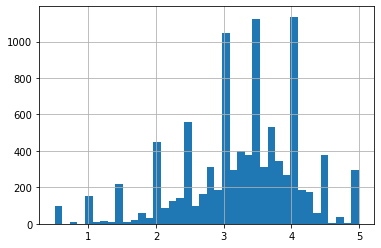

In [61]:
new_record['Average Ratings'].hist(bins = 40)

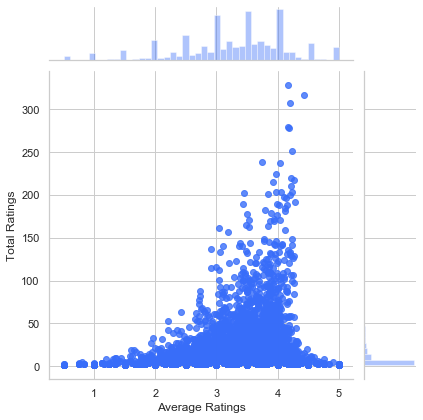

In [72]:
sns.jointplot(x = 'Average Ratings' , y = 'Total Ratings' , data = new_record , alpha = 0.8)

In [73]:
sns.set(style="whitegrid", palette="rainbow")

In [76]:
# sorting values ascending to the num of rating column

moviematrix = df.pivot_table(index= 'userId' , columns = 'title' , values = 'rating')

In [78]:
moviematrix.head()
moviematrix.columns

Index([''71 (2014)', ''Hellboy': The Seeds of Creation (2004)',
       ''Round Midnight (1986)', ''Salem's Lot (2004)',
       ''Til There Was You (1997)', ''Tis the Season for Love (2015)',
       ''burbs, The (1989)', ''night Mother (1986)',
       '(500) Days of Summer (2009)', '*batteries not included (1987)',
       ...
       'Zulu (2013)', '[REC] (2007)', '[REC]² (2009)',
       '[REC]³ 3 Génesis (2012)',
       'anohana: The Flower We Saw That Day - The Movie (2013)',
       'eXistenZ (1999)', 'xXx (2002)', 'xXx: State of the Union (2005)',
       '¡Three Amigos! (1986)', 'À nous la liberté (Freedom for Us) (1931)'],
      dtype='object', name='title', length=9719)

In [82]:
moviematrix['xXx (2002)'].head()

userId
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
Name: xXx (2002), dtype: float64

In [85]:
xXx_2002_ratings = moviematrix['xXx (2002)']

In [86]:
# taking all the ratings
xXx_2002_ratings.tail()

userId
606    NaN
607    NaN
608    3.5
609    NaN
610    2.0
Name: xXx (2002), dtype: float64

In [ ]:
# finding the similarity of the movie

In [88]:
movies_similar_xxx_2002 = moviematrix.corrwith(xXx_2002_ratings)

In [91]:
movies_similar_xxx_2002

title
'71 (2014)                                                                                       NaN
'Hellboy': The Seeds of Creation (2004)                                                          NaN
'Round Midnight (1986)                                                                           NaN
'Salem's Lot (2004)                                                                              NaN
'Til There Was You (1997)                                                                        NaN
'Tis the Season for Love (2015)                                                                  NaN
'burbs, The (1989)                                                                               NaN
'night Mother (1986)                                                                             NaN
(500) Days of Summer (2009)                                                                 0.831858
*batteries not included (1987)                                                       

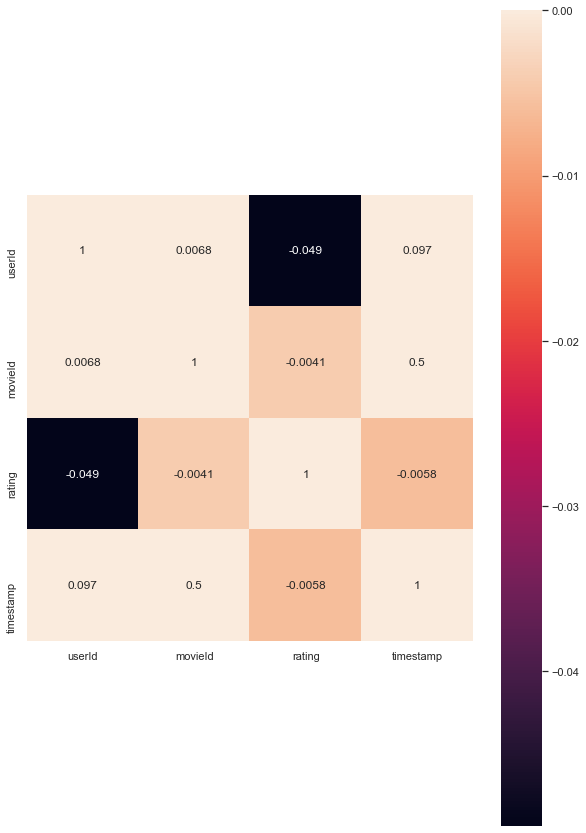

In [92]:
correlation_metrics = df.corr()
fig = plt.figure(figsize = (10,15))
sns.heatmap(correlation_metrics , annot = True , vmax = 0 , square = True)
plt.show()

In [95]:
xXx_2002_corr = pd.DataFrame(movies_similar_xxx_2002 , columns = ['Correlation'])
xXx_2002_corr.dropna(inplace = True)
xXx_2002_corr

,Correlation
title,
(500) Days of Summer (2009),0.831858
10 Cloverfield Lane (2016),0.802955
10 Items or Less (2006),1.000000
10 Things I Hate About You (1999),0.540062
"10,000 BC (2008)",0.177325
101 Dalmatians (1996),0.085210
101 Dalmatians (One Hundred and One Dalmatians) (1961),-0.558582
102 Dalmatians (2000),1.000000
11:14 (2003),-1.000000


# Thanks to great learning